<font color = green >

## Home Task

</font>

Apply various clustering algorithms 

- Agglomerative clustering using `complete` linkage 
- Agglomerative clustering using `single` linkage 
- DBSCAN
- Use albow method to determine the best k for Kmeans


<font color = green >

###  Data 

</font>



In [177]:
from sklearn.datasets import make_blobs
import numpy as np
import matplotlib.pyplot as plt

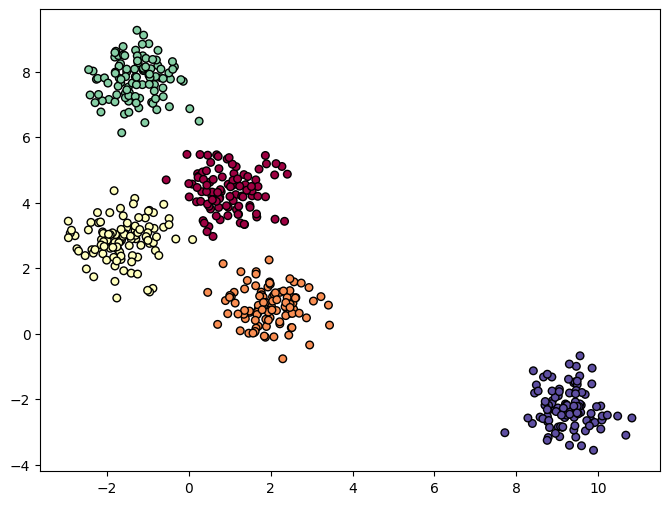

In [178]:
X, y = make_blobs(n_samples = 500, n_features = 2, centers = 5, 
                           cluster_std = 0.6, random_state = 0)

colors = np.array([plt.cm.Spectral(val)
          for val in np.linspace(0, 1, len(set(y)))])

plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c= colors[y], s= 30, edgecolors='black')    

### Agglomerative clustering using `complete` linkage 

In [199]:
from sklearn.cluster import AgglomerativeClustering

clf_linkage_complete = AgglomerativeClustering(n_clusters=5, linkage='complete')
predicted = clf_linkage_complete.fit_predict(X)

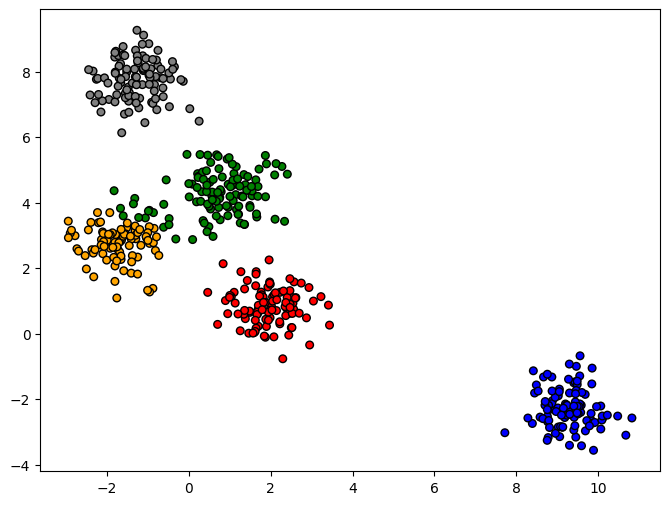

In [200]:
colors=  np.array(['green','red', 'gray', 'blue', 'orange'])
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=colors[predicted], s=30, edgecolors='black')

### Agglomerative clustering using `single` linkage 

In [181]:
from sklearn.cluster import AgglomerativeClustering

clf_linkage_single = AgglomerativeClustering(n_clusters=5, linkage='single')
predicted = clf_linkage_single.fit_predict(X)

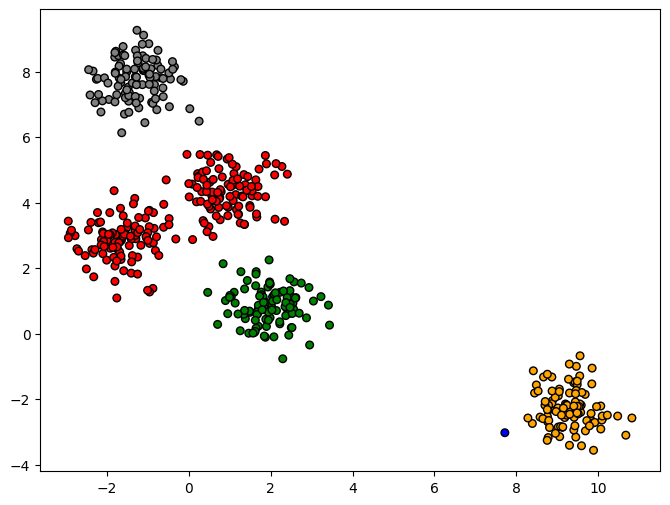

In [182]:
colors=  np.array(['green','red', 'gray', 'blue', 'orange'])
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=colors[predicted], s=30, edgecolors='black')

### DBSCAN

In [183]:
from sklearn.cluster import DBSCAN

dbscan = DBSCAN(eps=0.5, min_samples=4).fit(X)
predicted = dbscan.labels_
n_cluster_and_noice = len(np.unique(predicted))-1
predicted[np.where(predicted == -1)] = n_cluster_and_noice

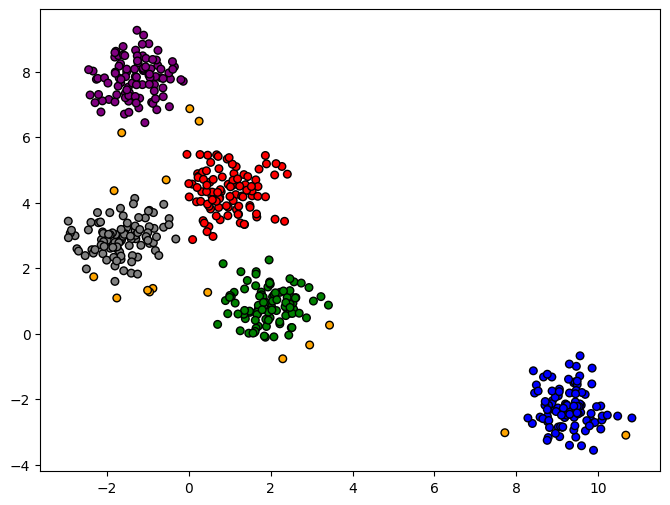

In [184]:
colors=  np.array(['green','red', 'gray', 'blue', 'purple', 'orange'])
plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=colors[predicted], s=30, edgecolors='black')

All orange points are noise, that is not assigned to any cluster.

### Use albow method to determine the best k for Kmeans

In [204]:
from sklearn.cluster import KMeans

# Technically, inertia is the same as variance
inertias = []

for k in range (1, 7):
    clf_KMeans = KMeans(n_clusters= k).fit(X)
    inertias.append(clf_KMeans.inertia_)

C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Admin\AppData\Roaming\Python\Python310\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The defa

Text(0, 0.5, 'inertia')

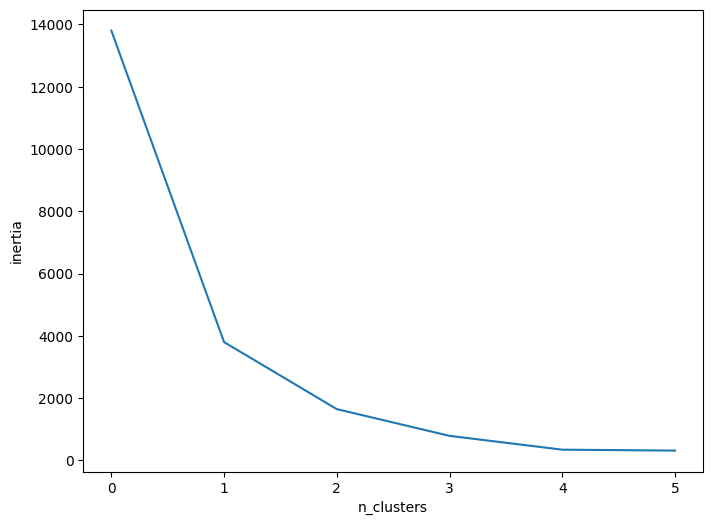

In [205]:
plt.figure(figsize=(8,6))
plt.plot(inertias)
plt.xlabel('n_clusters')
plt.ylabel('inertia')

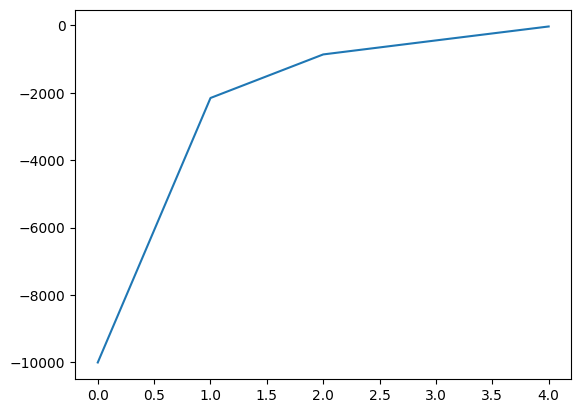

In [206]:
diff = np.diff(inertias)
plt.plot(diff)

Elbow method find the best k for Kmeans clustering. Is 4